# Unsupervised Learning
Unsupervised learning is a type of machine learning that deals with unlabeled data. This means the learning algorithm is not given any pre-defined categories or labels to guide the training process. Instead, the algorithm must find patterns and structures in the data on its own.


In [1]:
import pandas as pd
import numpy as np

# Loading Dataset

In [3]:
df= pd.read_csv(r"X:\BIA\Lectures\customer_segmentation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [4]:
df= df[['Age','Work_Experience','Family_Size']]
df.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [5]:
df.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [6]:
df= df.dropna()

In [7]:
df.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

## Transforming data into standardscaler form

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler= StandardScaler()

In [10]:
scaled_data= scaler.fit_transform(df)

In [11]:
scaled_data

array([[-1.29420836, -0.47629886,  0.75349091],
       [ 1.41867106, -0.47629886, -1.19897576],
       [ 1.41867106, -0.77173851, -0.54815354],
       ...,
       [-0.51048764, -0.47629886, -1.19897576],
       [ 0.21294687, -0.47629886,  1.40431313],
       [-0.02819797,  1.88721829,  0.10266869]])

# ELBOW METHOD
The Elbow Method is a popular technique used to determine the optimal number of clusters in K-means clustering, which is an unsupervised machine learning algorithm. The method involves running the clustering algorithm multiple times with a different number of clusters each time, and then plotting the results to find the point where the increase in the number of clusters does not significantly reduce the intra-cluster variance, which is a measure of the compactness of the clusters.

# Step 1:
* Importing KMeans and silhouette_score libraries
* Defining the no of clusters (k)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
k= 6

# Defining KMeans

In [15]:
kmean= KMeans(n_clusters= k, random_state= 42)

# Fitting KMeans of data

In [16]:
kmean.fit(scaled_data)

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdul\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\abdul\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: char

KMeans(n_clusters=6, random_state=42)

# kmean.labels_
It is used to access the labels assigned to each data point after the clustering algorithm has been run. Each data point in your dataset is assigned to one of the K clusters, and kmeans.labels_ contains this information in the form of an array.

In [17]:
kmean.labels_

array([0, 1, 1, ..., 4, 2, 3])

# Making a column with name 'Group' in dataset.

In [18]:
df['group']= kmean.labels_

In [19]:
df.head()

,Age,Work_Experience,Family_Size,group
0,22,1.0,4.0,0
2,67,1.0,1.0,1
3,67,0.0,2.0,1
5,56,0.0,2.0,1
6,32,1.0,3.0,0


# kmeans.inertia_ 
It is a measure of how internally coherent the clusters are. It represents the sum of squared distances of samples to their closest cluster center. Here's a breakdown of what it means and how it's used:

### Inertia Definition: 
Inertia is the sum of the squared distances between each data point and the centroid of its assigned cluster. It's a measure of how well the data points are clustered. A lower inertia value means that the clusters are more dense and well-separated.

### Usage in K-means: 
After fitting a K-means model to your data, kmeans.inertia_ gives you the inertia of the final solution. It's often used to evaluate the quality of the clustering and to determine the optimal number of clusters (k).

In [20]:
kmean.inertia_

7323.934017203182

# determine the optimal number of clusters.

### Inertia (Within-Cluster Sum of Squares): 
Inertia is the sum of squared distances of samples to their nearest cluster center. It's a measure of how internally coherent the clusters are. Lower inertia values are better and indicate more dense and well-separated clusters. However, inertia alone can be misleading since it generally decreases with increasing k, potentially suggesting a higher number of clusters than actually needed.

### Silhouette Score: 
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, the clustering configuration is appropriate. If many points have a low or negative value, the clustering configuration may have too many or too few clusters.

# _=_
* Defining the k_range (the number of clusters we want to have),

In [21]:
k_range= range(2,11)

In [22]:
inertia_values= []
silhouette_scores= []

for k in k_range:
    print(f"Trying K-Means clusttering for k= {k}")
    kmean= KMeans(n_clusters= k, random_state= 42) # Defining kmean same as above
    kmean.fit(scaled_data) # Fitting kmean on scaled_data
    inertia_values.append(kmean.inertia_) # Appending kmean.inertia_ to inertia_values
    
    sil_score= silhouette_score(scaled_data, kmean.labels_) # Finding silhouette score with help of scaled_data and kmean.labels_
    silhouette_scores.append(sil_score) # Appending sil_score to silhouette_score array

Trying K-Means clusttering for k= 2


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 3


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 4


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 5


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 6


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 7


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 8


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 9


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-Means clusttering for k= 10


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
inertia_values

[19587.613496215512,
 13014.473906709123,
 9801.310174180539,
 8530.875760394521,
 7323.934017203182,
 6285.10053934668,
 5761.0293784881,
 5360.813273358842,
 4968.988522118494]

In [24]:
silhouette_scores

[0.35409659911087576,
 0.3545471920506251,
 0.3518694007818695,
 0.3566923695393539,
 0.36285216732342,
 0.3636388885168001,
 0.33178636626243063,
 0.3235790483552644,
 0.33182025244828023]

### Now we got inertia values and silhoutte scores, so now we will plot a graph for Inertia values, silhouette scores and clusters

In [25]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

C:\Users\abdul\AppData\Local\Temp\ipykernel_12208\2670451075.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


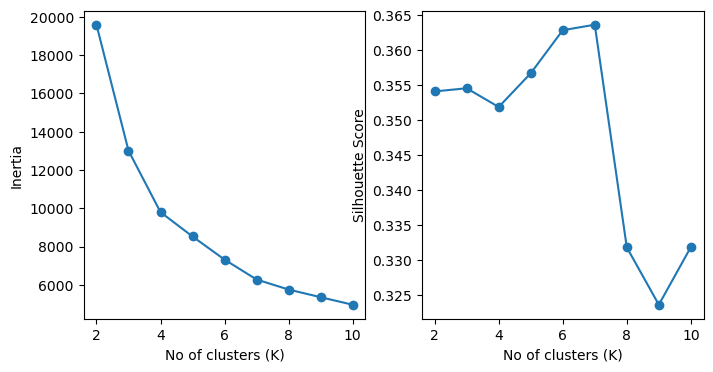

In [29]:
plt.figure(figsize= (8,4))
plt.title(" ELBOW METHOD ")

plt.subplot(1,2,1)
plt.plot(k_range, inertia_values, marker= 'o', linestyle= '-')
plt.xlabel("No of clusters (K)")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker= 'o', linestyle= '-')
plt.xlabel("No of clusters (K)")
plt.ylabel("Silhouette Score")

plt.show()

### From the graph we can depict that at point 4-5 the inertia start changes and also we got better sil_score at 4-6 clusters so so we can set our clusters to be 5.


In [30]:
kmean= KMeans(n_clusters= 5, random_state= 42)
kmean.fit(scaled_data)

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [31]:
kmean.inertia_

8530.875760394521

In [32]:
kmean.labels_

array([0, 3, 3, ..., 1, 4, 2])

In [33]:
df['group']= kmean.labels_

In [34]:
df.head()

,Age,Work_Experience,Family_Size,group
0,22,1.0,4.0,0
2,67,1.0,1.0,3
3,67,0.0,2.0,3
5,56,0.0,2.0,3
6,32,1.0,3.0,1


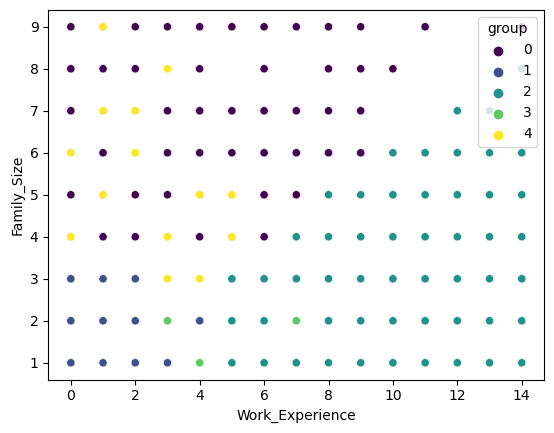

In [35]:
sns.scatterplot(x= 'Work_Experience', y='Family_Size', hue='group', data= df, palette= 'viridis')
plt.show()

# Working same on other dataset

In [36]:
dff= pd.read_csv(r"X:\BIA\Lectures\bank_transactions.csv")

In [37]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [39]:
dff.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [41]:
dff= dff[['CustAccountBalance','CustomerDOB','TransactionAmount (INR)']]
dff.head()

,CustAccountBalance,CustomerDOB,TransactionAmount (INR)
0,17819.05,10-01-1994,25.0
1,2270.69,04-04-1957,27999.0
2,17874.44,26-11-1996,459.0
3,866503.21,14-09-1973,2060.0
4,6714.43,24-03-1988,1762.5


# Converting DOB into age

In [42]:
from datetime import datetime

# Function to calculate age
def calculate_age(dob):
    if isinstance(dob, str):
        try:    
            dob = datetime.strptime(dob, "%d-%m-%Y")
            today = datetime.today()
            return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
        except ValueError:
            return None
# df = df[~df["CustomerDOB"].astype(str).str.contains('/')]
# df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], format = "%d-%m-%Y")
dff["Age"] = dff["CustomerDOB"].apply(calculate_age)

C:\Users\abdul\AppData\Local\Temp\ipykernel_12208\152741905.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Age"] = dff["CustomerDOB"].apply(calculate_age)


In [43]:
dff.head()

,CustAccountBalance,CustomerDOB,TransactionAmount (INR),Age
0,17819.05,10-01-1994,25.0,29.0
1,2270.69,04-04-1957,27999.0,66.0
2,17874.44,26-11-1996,459.0,27.0
3,866503.21,14-09-1973,2060.0,50.0
4,6714.43,24-03-1988,1762.5,35.0


In [49]:
dff= dff[['CustAccountBalance','Age','TransactionAmount (INR)']]
dff

,CustAccountBalance,Age,TransactionAmount (INR)
0,17819.05,29.0,25.0
1,2270.69,66.0,27999.0
2,17874.44,27.0,459.0
3,866503.21,50.0,2060.0
4,6714.43,35.0,1762.5
...,...,...,...
19995,9961.78,34.0,47.0
19996,7120.57,36.0,300.0
19997,118130.78,53.0,3400.0
19998,13226.06,30.0,500.0


In [48]:
dff.isnull().sum()

CustAccountBalance           27
Age                        1362
TransactionAmount (INR)       0
dtype: int64

In [52]:
dff= dff.dropna()
dff.isnull().sum()

CustAccountBalance         0
Age                        0
TransactionAmount (INR)    0
dtype: int64

# Converting Data into scaler form

In [53]:
scaler= StandardScaler()

In [54]:
scaled_data= scaler.fit_transform(dff)
scaled_data

array([[-0.1328906 , -1.0208068 , -0.22799554],
       [-0.15540715,  3.1413778 ,  3.97835493],
       [-0.13281039, -1.24578975, -0.16273651],
       ...,
       [ 0.01237704,  1.67898862,  0.27949116],
       [-0.139542  , -0.90831533, -0.15657148],
       [ 0.39388248, -0.23336647, -0.19115576]])

In [55]:
inertia_values= []
silhoutte_scores= []

k_range= range(2,11)
for k in k_range:
    print(f"Trying K-means clustering for k= {k}")
    kmean= KMeans(n_clusters= k, random_state= 42)
    kmean.fit(scaled_data)
    inertia_values.append(kmean.inertia_)
    
    sil_score= silhouette_score(scaled_data, kmean.labels_)
    silhoutte_scores.append(sil_score)

Trying K-means clustering for k= 2


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 3


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 4


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 5


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 6


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 7


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 8


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 9


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Trying K-means clustering for k= 10


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
kmean.labels_

array([7, 6, 7, ..., 4, 7, 0])

In [57]:
kmean.inertia_

7387.4657468280975

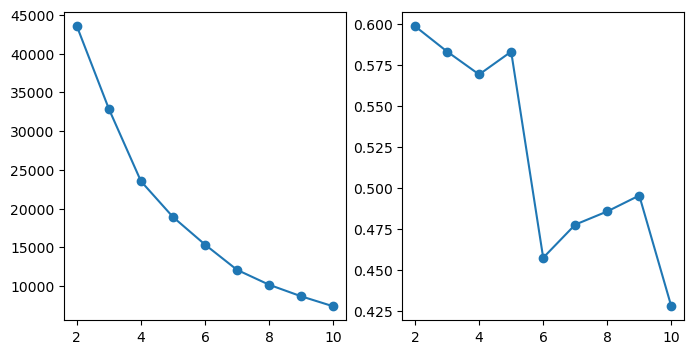

In [58]:
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.plot(k_range, inertia_values, marker= 'o', linestyle= '-')

plt.subplot(1,2,2)
plt.plot(k_range, silhoutte_scores, marker= 'o', linestyle= '-')

plt.show()

# From these graphs we can say that the best no of clusters will be 5.

In [60]:
kmean= KMeans(n_clusters= 5, random_state= 42)
kmean.fit(scaled_data)

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [61]:
kmean.labels_

array([0, 3, 0, ..., 3, 0, 0])

In [62]:
kmean.inertia_

18909.12688488829

In [63]:
dff['Segments']= kmean.labels_

C:\Users\abdul\AppData\Local\Temp\ipykernel_12208\3551633003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Segments']= kmean.labels_


In [64]:
dff.head()

,CustAccountBalance,Age,TransactionAmount (INR),Segments
0,17819.05,29.0,25.0,0
1,2270.69,66.0,27999.0,3
2,17874.44,27.0,459.0,0
3,866503.21,50.0,2060.0,3
4,6714.43,35.0,1762.5,0


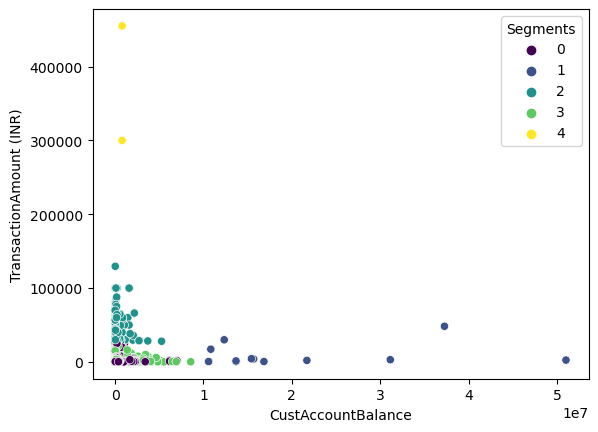

In [65]:
sns.scatterplot(x= 'CustAccountBalance', y='TransactionAmount (INR)', hue= 'Segments', data= dff, palette= 'viridis')
plt.show()

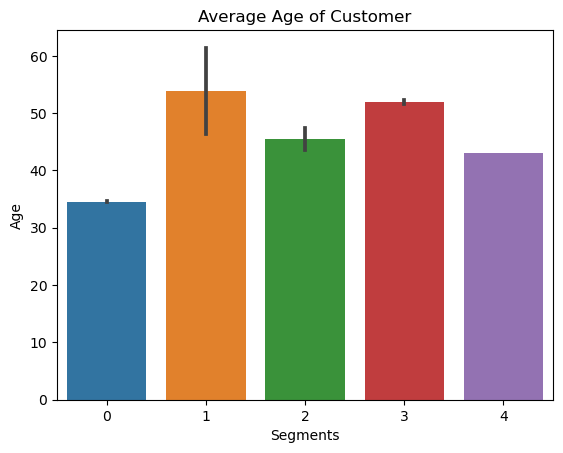

In [66]:
sns.barplot(x= 'Segments', y= 'Age', data= dff)
plt.title("Average Age of Customer")
plt.show()

C:\Users\abdul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


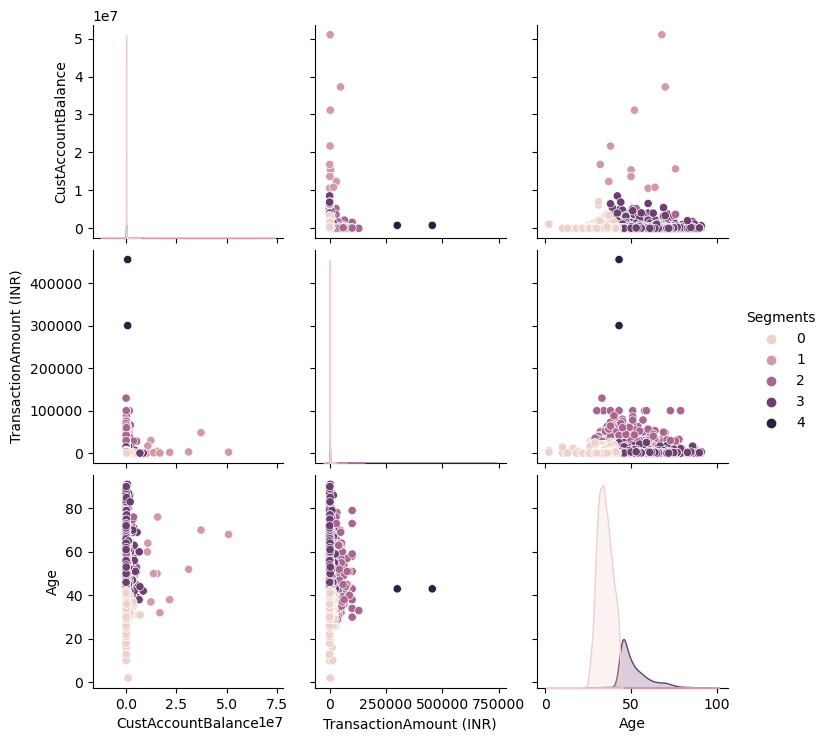

In [67]:
sns.pairplot(dff, vars= ['CustAccountBalance', 'TransactionAmount (INR)', 'Age'], hue= 'Segments')
plt.show()

# Heirerichal Clusterring
Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It's commonly used in data analysis to organize data points into a tree-like structure based on their similarity.

## Agglomerative: 
Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In [68]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [69]:
scaled_data

array([[-0.1328906 , -1.0208068 , -0.22799554],
       [-0.15540715,  3.1413778 ,  3.97835493],
       [-0.13281039, -1.24578975, -0.16273651],
       ...,
       [ 0.01237704,  1.67898862,  0.27949116],
       [-0.139542  , -0.90831533, -0.15657148],
       [ 0.39388248, -0.23336647, -0.19115576]])

### Extracting first 4000 items from an array.

In [70]:
scaled_df= scaled_data[:4000]

In [71]:
scaled_df.shape

(4000, 3)

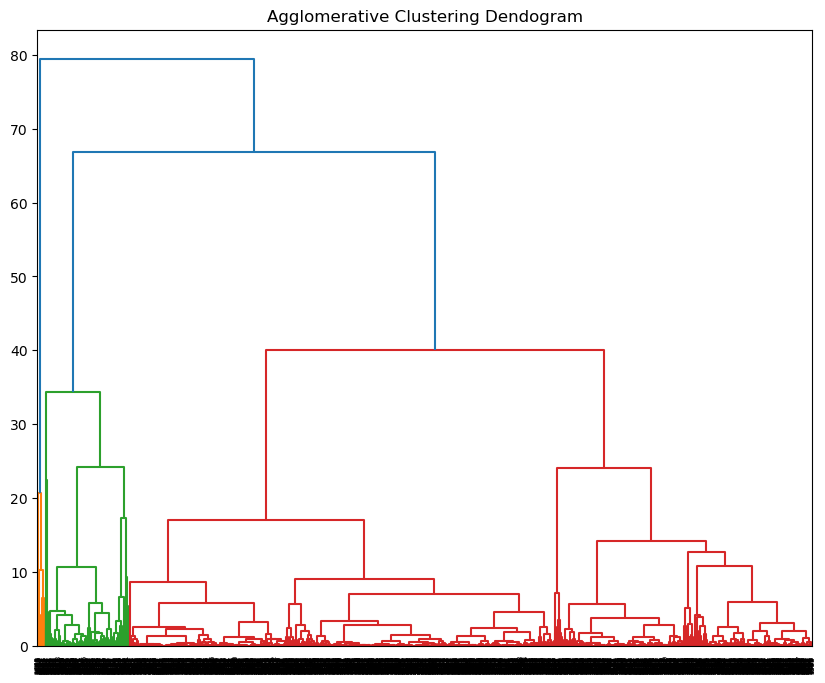

In [72]:
plt.figure(figsize= (10,8))
plt.title("Agglomerative Clustering Dendogram")
dnd= dendrogram(linkage(scaled_df, method= 'ward'))

## Defining Agglomerative Clustering

In [73]:
agg_cluster= AgglomerativeClustering(n_clusters= 6, linkage= 'ward')

In [76]:
agg_cluster.fit_predict(scaled_df)

array([3, 2, 3, ..., 3, 3, 0], dtype=int64)